In [1]:
import numpy as np
import ccdproc as cp
import matplotlib.pyplot as plt
import astropy.units as u
import scipy.signal as ss
import scipy.ndimage.filters as sf
from skimage.feature import peak_local_max
from mxdrs.Recipes import cal_loc_one_mx as c

%matplotlib inline

In [3]:
ccd = cp.fits_ccddata_reader('flat1.fits', unit=u.adu)
plt.plot(ccd.data[])

In [27]:
nccd = sf.median_filter(ccd.data, size=2)
coords = peak_local_max(nccd, min_distance=10, threshold_abs=400)

<IPython.core.display.Javascript object>


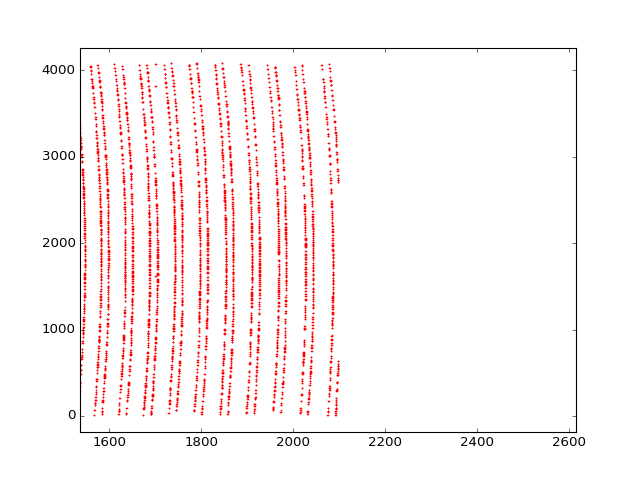

In [28]:
%matplotlib notebook
plt.plot(coords[:, 1], coords[:, 0], 'r.', markersize=2)
plt.show()

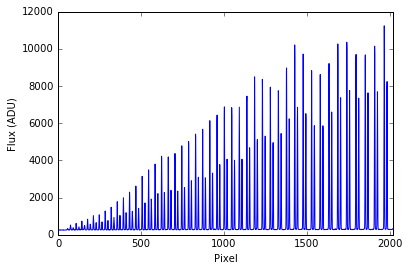

In [12]:
%matplotlib inline
plt.plot(ccd.data[2019])
plt.xlim(0, 2019)
plt.ylabel('Flux (ADU)')
plt.xlabel('Pixel')
plt.show()

In [ ]:
nccd = sf.median_filter(ccd.data, size=3)

In [ ]:
row = 100
peakind = ss.find_peaks_cwt(nccd[row], widths=np.arange(1,15), min_snr=1.0)

plt.plot(ccd.data[row])

for pk in peakind:
    plt.plot(pk, ccd.data[row, pk], '*', color='r')
plt.xlim(0, 2148)
plt.ylabel('Flux (ADU)')
plt.xlabel('Pixel')
plt.show()

In [ ]:
row_cut, peaks_in_row = c.cal_loc('list.lis',row_border_offset=100, hdu=0, adjacent_rows=5)
lens = np.array([len(pk) for pk in peaks_in_row[0][:]])

In [ ]:
%matplotlib notebook
orders = []
for k in range(10):#(number_of_orders):
    x_order = []
    y_order = []
    for i in range(len(row_cut[0][:])):
        x_order.append(row_cut[0][i])
        y_order.append(peaks_in_row[0][i][k])
    orders.append([x_order, y_order])

o = 2
plt.plot(orders[o][0], orders[o][1], '.')
plt.plot(orders[o+1][0], orders[o+1][1], '.', color='r')
plt.plot(orders[o-1][0], orders[o-1][1], '.', color='g')
plt.show()
#plt.xlim(0,500)
#plt.show()